# 6. Sorting and Searching

Sorting and Searching

- 6.1. Objectives
- 6.2. Searching
- 6.3. The Sequential Search
    - 6.3.1. Analysis of Sequential Search
- 6.4. The Binary Search
    - 6.4.1. Analysis of Binary Search
- 6.5. Hashing
    - 6.5.1. Hash Functions
    - 6.5.2. Collision Resolution
    - 6.5.3. Implementing the Map Abstract Data Type
    - 6.5.4. Analysis of Hashing
- 6.6. Sorting
- 6.7. The Bubble Sort
- 6.8. The Selection Sort
- 6.9. The Insertion Sort
- 6.10. The Shell Sort
- 6.11. The Merge Sort
- 6.12. The Quick Sort
- 6.13. Summary
- 6.14. Key Terms
- 6.15. Discussion Questions
- 6.16. Programming Exercises

# 6.1. Objectives

- To be able to explain and implement sequential search and binary search.
- To be able to explain and implement selection sort, bubble sort, merge sort, quick sort, insertion sort, and Shell sort.
- To understand the idea of hashing as a search technique.
- To introduce the map abstract data type.
- To implement the map abstract data type using hashing.

# 6.3. The Sequential Search

When data items are stored in a collection such as a list, we say that they have a linear or sequential relationship. Each data item is stored in a position relative to the others. In Python lists, these relative positions are the index values of the individual items. Since these index values are ordered, it is possible for us to visit them in sequence. This process gives rise to our first searching technique, the sequential search.

Figure 1 shows how this search works. Starting at the first item in the list, we simply move from item to item, following the underlying sequential ordering until we either find what we are looking for or run out of items. If we run out of items, we have discovered that the item we were searching for was not present.

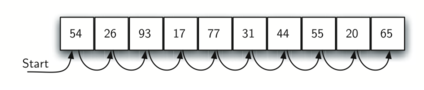

Figure 1: Sequential Search of a List of Integers

The Python implementation for this algorithm is shown in CodeLens 1. The function needs the list and the item we are looking for and returns a boolean value as to whether it is present.

In [4]:
def sequential_search(a_list, item):
    pos = 0

    while pos < len(a_list):
        if a_list[pos] == item:
            return True
        else:
            pos = pos + 1

    return False

In [5]:
sequential_search([1, 2, 32, 8, 17, 19, 42, 13, 0], 17)

True

In [6]:
def order_sequential_search(a_list, item):
    pos = 0

    while pos < len(a_list):
        if a_list[pos] == item:
            return True
        else:
            if a_list[pos] > item:
                return False
            else:
                pos = pos + 1

    return False

In [8]:
sequential_search([0, 1, 2, 8, 13, 17, 19, 32, 42], 19)

True

# 6.4. The Binary Search

It is possible to take greater advantage of the ordered list if we are clever with our comparisons. In the sequential search, when we compare against the first item, there are at most n−1 more items to look through if the first item is not what we are looking for. Instead of searching the list in sequence, a binary search will start by examining the middle item. If that item is the one we are searching for, we are done. If it is not the correct item, we can use the ordered nature of the list to eliminate half of the remaining items. If the item we are searching for is greater than the middle item, we know that the entire lower half of the list as well as the middle item can be eliminated from further consideration. The item, if it is in the list, must be in the upper half.

We can then repeat the process with the upper half. Start at the middle item and compare it against what we are looking for. Again, we either find it or split the list in half, therefore eliminating another large part of our possible search space. Figure 3 shows how this algorithm can quickly find the value 54. The complete function is shown in CodeLens 3.

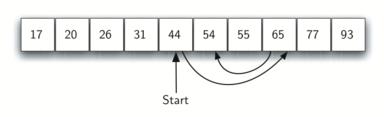

Figure 3: Binary Search of an Ordered List of Integers

In [9]:
def binary_search(a_list, item):
    first = 0
    last = len(a_list) - 1

    while first <= last:
        midpoint = (first + last) // 2
        if a_list[midpoint] == item:
            return True
        elif item < a_list[midpoint]:
            last = midpoint - 1
        else:
            first = midpoint + 1

    return False

In [13]:
binary_search([0, 1, 2, 8, 13, 17, 19, 32, 42],13)

True

In [ ]:
## Versión recursiva

def binary_search_rec(a_list, item):
    if len(a_list) == 0:
        return False
    else:
        midpoint = len(a_list) // 2
        if a_list[midpoint] == item:
            return True
        elif item < a_list[midpoint]:
            return binary_search_rec(a_list[:midpoint], item)
        else:
            return binary_search_rec(a_list[midpoint + 1 :], item)

# 6.4.1. Analysis of Binary Search

To analyze the binary search algorithm, we need to recall that each comparison eliminates about half of the remaining items from consideration. What is the maximum number of comparisons this algorithm will require to check the entire list? If we start with n items, about $\frac{n}{2}$ items will be left after the first comparison. After the second comparison, there will be about $\frac{n}{4}$. Then $\frac{n}{8}$, $\frac{n}{16}$, and so on. How many times can we split the list? Table 3 helps us to see the answer.

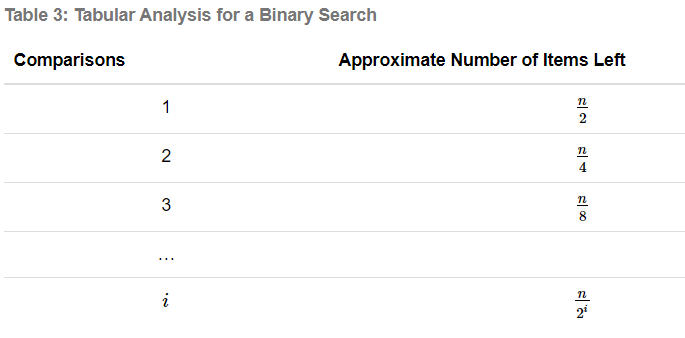

When we split the list enough times, we end up with a list that has just one item. Either that is the item we are looking for or it is not. Either way, we are done. The number of comparisons necessary to get to this point is i where $\frac {n}{2^i} =1$. Solving for i gives us i=logn. The maximum number of comparisons is logarithmic with respect to the number of items in the list. Therefore, the binary search is O(logn).

One additional analysis issue needs to be addressed. In the recursive solution shown above, the recursive call,

binary_search_rec(a_list[:midpoint], item)

uses the slice operator to create the left half of the list that is then passed to the next invocation (similarly for the right half as well). The analysis that we did above assumed that the slice operator takes constant time. However, we know that the slice operator in Python is actually O(k). This means that the binary search using slice will not perform in strict logarithmic time. Luckily this can be remedied by passing the list along with the starting and ending indices. The indices can be calculated as we did in Listing 3. We leave this implementation as an exercise.

Even though a binary search is generally better than a sequential search, it is important to note that for small values of n, the additional cost of sorting is probably not worth it. In fact, we should always consider whether it is cost effective to take on the extra work of sorting to gain searching benefits. If we can sort once and then search many times, the cost of the sort is not so significant. However, for large lists, sorting even once can be so expensive that simply performing a sequential search from the start may be the best choice.

In [17]:
sum([3,4])

7

In [20]:
sum([ord(c) for c in 'cat'])

312

In [21]:
[ord(c) for c in 'cat']

[99, 97, 116]

In [23]:
### Hash table queda pendiente porque es un chingo

# 6.6. Sorting

Sorting is the process of placing elements from a collection in some kind of order. For example, a list of words could be sorted alphabetically or by length. A list of cities could be sorted by population, by area, or by zip code. We have already seen a number of algorithms that were able to benefit from having a sorted list (recall the final anagram example and the binary search).

There are many, many sorting algorithms that have been developed and analyzed. This suggests that sorting is an important area of study in computer science. Sorting a large number of items can take a substantial amount of computing resources. Like searching, the efficiency of a sorting algorithm is related to the number of items being processed. For small collections, a complex sorting method may be more trouble than it is worth. The overhead may be too high. On the other hand, for larger collections, we want to take advantage of as many improvements as possible. In this section we will discuss several sorting techniques and compare them with respect to their running time.

Before getting into specific algorithms, we should think about the operations that can be used to analyze a sorting process. First, it will be necessary to compare two values to see which is smaller (or larger). In order to sort a collection, it will be necessary to have some systematic way to compare values to see if they are out of order. The total number of comparisons will be the most common way to measure a sort procedure. Second, when values are not in the correct position with respect to one another, it may be necessary to exchange them. This exchange is a costly operation and the total number of exchanges will also be important for evaluating the overall efficiency of the algorithm.

# 6.7. The Bubble Sort

The bubble sort makes multiple passes through a list. It compares adjacent items and exchanges those that are out of order. Each pass through the list places the next largest value in its proper place. In essence, each item “bubbles” up to the location where it belongs.

Figure 1 shows the first pass of a bubble sort. The shaded items are being compared to see if they are out of order. If there are n items in the list, then there are n−1 pairs of items that need to be compared on the first pass. It is important to note that once the largest value in the list is part of a pair, it will continually be moved along until the pass is complete.

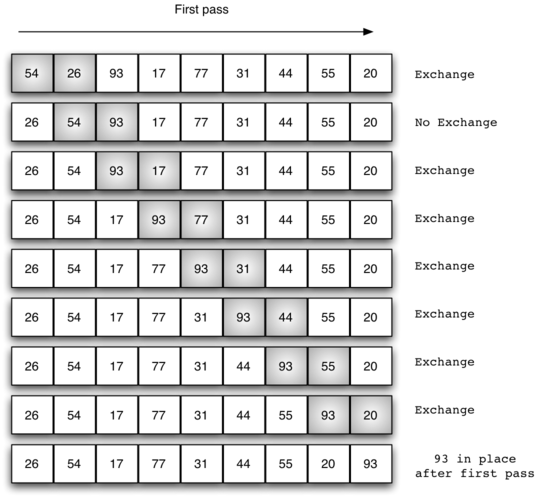

At the start of the second pass, the largest value is now in place. There are n−1 items left to sort, meaning that there will be n−2 pairs. Since each pass places the next largest value in place, the total number of passes necessary will be n−1. After completing the n−1 passes, the smallest item must be in the correct position with no further processing required. ActiveCode 1 shows the complete bubble_sort function. It takes the list as a parameter, and modifies it by exchanging items as necessary.

The exchange operation, sometimes called a “swap,” is slightly different in Python than in most other programming languages. Typically, swapping two elements in a list requires a temporary storage location (an additional memory location). A code fragment such as

In [26]:
# temp = a_list[i]
# a_list[i] = a_list[j]
# a_list[j] = temp

will exchange the i-th and j-th items in the list. Without the temporary storage, one of the values would be overwritten.

In Python, it is possible to perform simultaneous assignment. The statement a, b = b, a will result in two assignment statements being done at the same time (see Figure 2). Using simultaneous assignment, the exchange operation can be done in one statement.

Lines 5-7 in ActiveCode 1 perform the exchange of the i and (i+1)-th items using the three–step procedure described earlier. Note that we could also have used the simultaneous assignment to swap the items.

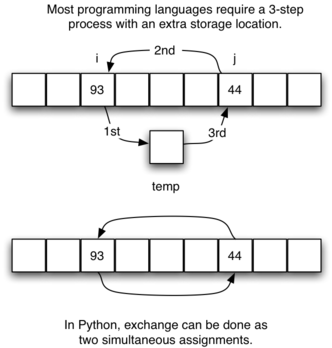

In [1]:
def bubble_sort(a_list):
    for i in range(len(a_list) - 1, 0, -1):
        for j in range(i):
            if a_list[j] > a_list[j + 1]:
                temp = a_list[j]
                a_list[j] = a_list[j + 1]
                a_list[j + 1] = temp



In [17]:
a_list = [54, 26, 93, 17, 77, 31, 44, 55, 20]
bubble_sort(a_list)
print(a_list)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [19]:
a_list

[17, 20, 26, 31, 44, 54, 55, 77, 93]